<a href="https://colab.research.google.com/github/ryleedav/ryleedav.github.io/blob/main/FinalProject491.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



📂 Processing file: /content/firsthalf.txt

🧠 Sentiment Analysis Results for Verbs:
        Token  Sentiment_Score Sentiment_Label
0    teaching           0.0000         Neutral
1        wear           0.0000         Neutral
2       hoped           0.3818        Positive
3        drew           0.0000         Neutral
4      derive           0.0000         Neutral
..        ...              ...             ...
103   suggest           0.0000         Neutral
104   writing           0.0000         Neutral
105   viewing           0.0000         Neutral
106      feel           0.0000         Neutral
107   develop           0.0000         Neutral

[108 rows x 3 columns]
✅ Verb results saved to /content/firsthalf_verb_sentiment_results.csv


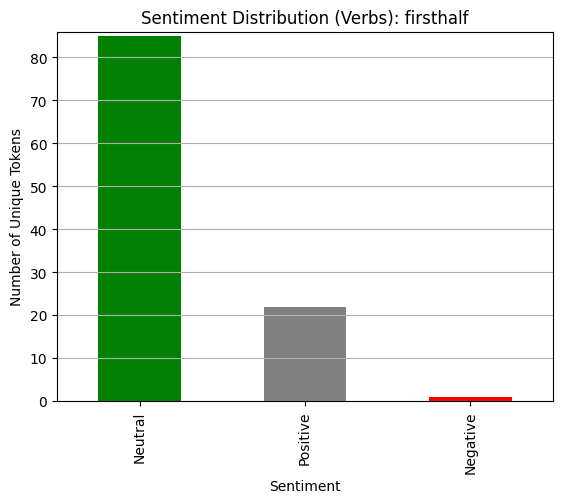


🧠 Sentiment Analysis Results for Adjectives:
            Token  Sentiment_Score Sentiment_Label
0       effective           0.4767        Positive
1        american           0.0000         Neutral
2         several           0.0000         Neutral
3      additional           0.0000         Neutral
4     experienced           0.0000         Neutral
5        critical          -0.3182        Negative
6          better           0.4404        Positive
7           other           0.0000         Neutral
8   undergraduate           0.0000         Neutral
9    professional           0.0000         Neutral
10        ongoing           0.0000         Neutral
11           many           0.0000         Neutral
12        service           0.0000         Neutral
13    intelligent           0.4588        Positive
14           good           0.4404        Positive
15      potential           0.0000         Neutral
16           most           0.0000         Neutral
17            new           0.0000  

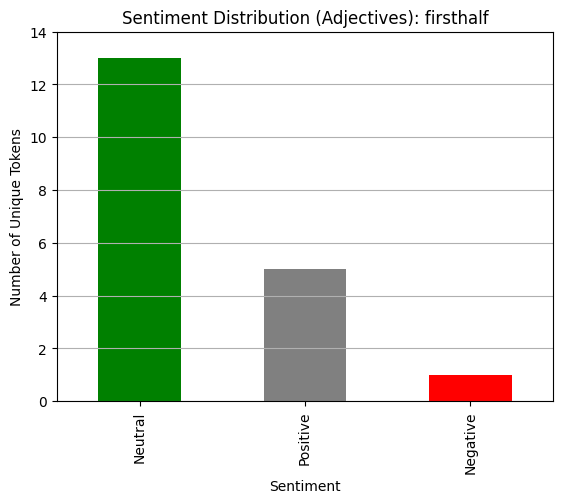

NameError: name 'process_document' is not defined

In [ ]:
# Install necessary dependencies for NLP, sentiment analysis, and plotting
!pip install -q spacy nltk matplotlib pandas
!python -m spacy download en_core_web_sm

# Import required libraries
import spacy  # spaCy for NLP tasks like tokenization and part-of-speech tagging
import pandas as pd  # pandas for handling data structures like DataFrames
import matplotlib.pyplot as plt  # matplotlib for plotting sentiment distribution
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER sentiment analyzer from NLTK
import nltk  # NLTK package for text processing
import os  # OS package for file path handling

# Download the VADER lexicon required for sentiment analysis from NLTK
nltk.download('vader_lexicon')

# Load spaCy's English language model for tokenization and part-of-speech tagging
nlp = spacy.load("en_core_web_sm")

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to find verbs adjacent to the word "tutor" or "tutors"
def find_adjacent_verbs(text):
    doc = nlp(text)  # Use spaCy to process the text and create a document object
    verbs = []  # Initialize an empty list to store verbs next to "tutor" or "tutors"

    for i, token in enumerate(doc):  # Iterate through the tokens in the document
        if token.text.lower() in ["tutor", "tutors"]:  # Check if the token is "tutor" or "tutors"
            # Check the previous token to see if it's a verb
            if i > 0 and doc[i - 1].pos_ == "VERB":  # If the previous token is a verb, add it
                verbs.append(doc[i - 1].text.lower())  # Add the verb to the list (convert to lowercase)
            # Check the next token to see if it's a verb
            if i < len(doc) - 1 and doc[i + 1].pos_ == "VERB":  # If the next token is a verb, add it
                verbs.append(doc[i + 1].text.lower())  # Add the verb to the list (convert to lowercase)

    # Remove duplicates by converting the list to a set, then back to a list
    unique_verbs = list(set(verbs))  # The set removes duplicates automatically
    return unique_verbs  # Return the unique verbs

# Function to find adjectives adjacent to the word "tutor" or "tutors"
def find_adjacent_adjectives(text):
    doc = nlp(text)  # Process the text with spaCy to get a document object
    adjectives = []  # Initialize an empty list to store adjectives next to "tutor" or "tutors"

    for i, token in enumerate(doc):  # Iterate through the tokens in the document
        if token.text.lower() in ["tutor", "tutors"]:  # If the token is "tutor" or "tutors"
            # Check the previous token to see if it's an adjective
            if i > 0 and doc[i - 1].pos_ == "ADJ":  # If the previous token is an adjective, add it
                adjectives.append(doc[i - 1].text.lower())  # Add the adjective to the list (convert to lowercase)
            # Check the next token to see if it's an adjective
            if i < len(doc) - 1 and doc[i + 1].pos_ == "ADJ":  # If the next token is an adjective, add it
                adjectives.append(doc[i + 1].text.lower())  # Add the adjective to the list (convert to lowercase)

    # Remove duplicates by converting the list to a set, then back to a list
    unique_adjectives = list(set(adjectives))  # The set removes duplicates automatically
    return unique_adjectives  # Return the unique adjectives

# Function to perform sentiment analysis on a list of words (verbs or adjectives)
def analyze_sentiment(tokens):
    results = []  # Initialize an empty list to store sentiment analysis results
    for token in tokens:  # Iterate over each token (verb or adjective)
        score = sia.polarity_scores(token)['compound']  # Get the compound sentiment score for the token
        # Classify the sentiment based on the compound score
        if score > 0.05:  # Positive sentiment
            sentiment = 'Positive'
        elif score < -0.05:  # Negative sentiment
            sentiment = 'Negative'
        else:  # Neutral sentiment
            sentiment = 'Neutral'
        # Append the result as a dictionary to the results list
        results.append({'Token': token, 'Sentiment_Score': score, 'Sentiment_Label': sentiment})
    # Convert the results to a pandas DataFrame for easy handling
    return pd.DataFrame(results)

# Function to plot sentiment counts (Positive, Negative, Neutral)
def plot_sentiment_counts(df, title):
    sentiment_counts = df['Sentiment_Label'].value_counts()  # Count the occurrences of each sentiment label
    sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])  # Plot the counts as a bar chart
    plt.title(title)  # Set the title of the plot
    plt.xlabel('Sentiment')  # Set the x-axis label
    plt.ylabel('Number of Unique Tokens')  # Set the y-axis label
    plt.ylim(0, max(sentiment_counts) + 1)  # Set the y-axis limits to fit the data
    plt.grid(axis='y')  # Add gridlines on the y-axis for better readability
    plt.show()  # Display the plot

# Set the file path for your document
file_path_1 = '/content/firsthalf.txt'  # Replace with your actual file path
file_path_2 = '/content/tutors.txt'  # Replace with your actual file path

# Process the file
print(f"\n📂 Processing file: {file_path}")
try:
    # Open the file and read its contents into the text variable
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()  # Read the entire text from the file

    # Find unique verbs next to "tutor" or "tutors"
    verbs = find_adjacent_verbs(text)
    # Find unique adjectives next to "tutor" or "tutors"
    adjectives = find_adjacent_adjectives(text)

    # Sentiment analysis for verbs
    if verbs:
        verb_sentiment_df = analyze_sentiment(verbs)  # Analyze the sentiment of the verbs
        print("\n🧠 Sentiment Analysis Results for Verbs:")  # Print a message indicating results for verbs
        print(verb_sentiment_df)  # Print the sentiment analysis results for verbs

        # Save the verb sentiment analysis results to a CSV file
        folder = os.path.dirname(file_path)  # Get the folder path where the file is stored
        base_name = os.path.splitext(os.path.basename(file_path))[0]  # Get the base name of the file (without extension)
        output_csv_path_verbs = os.path.join(folder, f"{base_name}_verb_sentiment_results.csv")  # Create the output CSV path
        verb_sentiment_df.to_csv(output_csv_path_verbs, index=False)  # Save the DataFrame to a CSV file
        print(f"✅ Verb results saved to {output_csv_path_verbs}")  # Print confirmation

        # Plot sentiment distribution for verbs
        plot_title_verbs = f"Sentiment Distribution (Verbs): {base_name}"  # Title for the plot
        plot_sentiment_counts(verb_sentiment_df, plot_title_verbs)  # Generate the plot for verbs
    else:
        print("No verbs found next to 'tutor' or 'tutors'.")  # If no verbs were found, print a message

    # Sentiment analysis for adjectives
    if adjectives:
        adj_sentiment_df = analyze_sentiment(adjectives)  # Analyze the sentiment of the adjectives
        print("\n🧠 Sentiment Analysis Results for Adjectives:")  # Print a message indicating results for adjectives
        print(adj_sentiment_df)  # Print the sentiment analysis results for adjectives

        # Save the adjective sentiment analysis results to a CSV file
        output_csv_path_adjectives = os.path.join(folder, f"{base_name}_adj_sentiment_results.csv")  # Create the output CSV path for adjectives
        adj_sentiment_df.to_csv(output_csv_path_adjectives, index=False)  # Save the DataFrame to a CSV file
        print(f"✅ Adjective results saved to {output_csv_path_adjectives}")  # Print confirmation

        # Plot sentiment distribution for adjectives
        plot_title_adjectives = f"Sentiment Distribution (Adjectives): {base_name}"  # Title for the plot
        plot_sentiment_counts(adj_sentiment_df, plot_title_adjectives)  # Generate the plot for adjectives
    else:
        print("No adjectives found next to 'tutor' or 'tutors'.")  # If no adjectives were found, print a message

except Exception as e:
    print(f"❗Error processing file {file_path}: {e}")  # If an error occurs, print the error message

#Process both documents
process_document(file_path_1)
process_document(file_path_2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Error processing file /content/tutoring.txt: [E088] Text of length 1460963 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

🔵 Combined Verb Sentiment Analysis


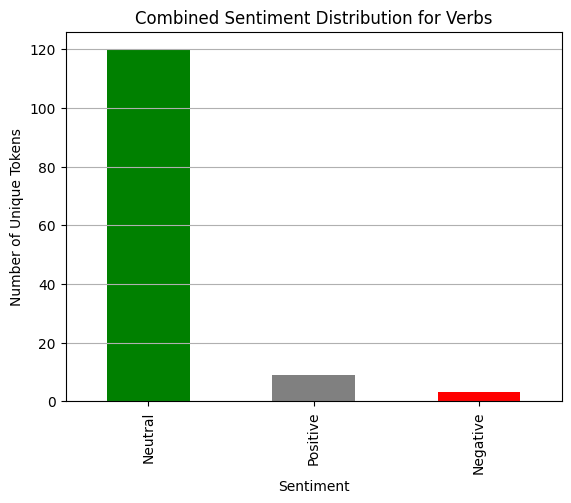


🟣 Combined Adjective Sentiment Analysis


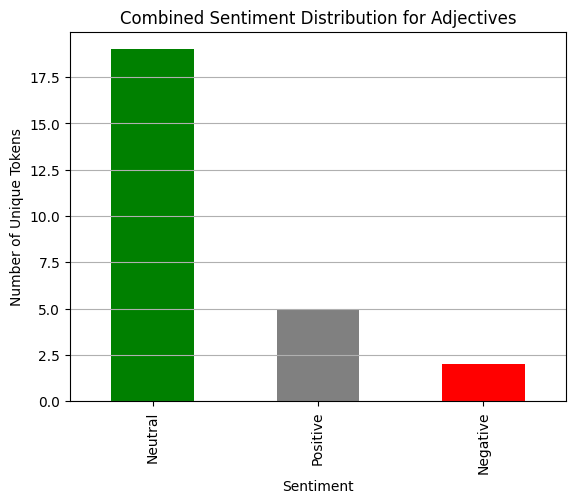

In [ ]:
# Install necessary libraries silently
!pip install -q spacy nltk matplotlib pandas

# Download the small English model for spaCy
!python -m spacy download en_core_web_sm

# Import required Python libraries
import spacy                       # For natural language processing tasks
import pandas as pd                # For working with data tables (DataFrames)
import matplotlib.pyplot as plt    # For creating graphs and visualizations
from nltk.sentiment import SentimentIntensityAnalyzer  # For performing sentiment analysis
import nltk                        # NLTK (Natural Language Toolkit) for language tools
import os                          # For handling file paths

# Download the VADER sentiment lexicon used by NLTK's SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load the small English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

# Initialize the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ======================== FUNCTIONS ===========================

# Function to find verbs directly next to the word "tutor" or "tutors"
def find_adjacent_verbs(text):
    doc = nlp(text)  # Parse the text with spaCy
    verbs = []       # List to store found verbs
    for i, token in enumerate(doc):  # Loop through each word (token) in the text
        if token.text.lower() in ["tutor", "tutors", "session"]:  # Check if the word is 'tutor' or 'tutors'
            # Check the word before and after 'tutor'
            if i > 0 and doc[i - 1].pos_ == "VERB":
                verbs.append(doc[i - 1].text.lower())
            if i < len(doc) - 1 and doc[i + 1].pos_ == "VERB":
                verbs.append(doc[i + 1].text.lower())
    return list(set(verbs))  # Remove duplicates by converting to a set and back to a list

# Function to find adjectives directly next to the word "tutor" or "tutors"
def find_adjacent_adjectives(text):
    doc = nlp(text)  # Parse the text with spaCy
    adjectives = []  # List to store found adjectives
    for i, token in enumerate(doc):  # Loop through each word
        if token.text.lower() in ["tutor", "tutors"]:
            # Check the word before and after 'tutor'
            if i > 0 and doc[i - 1].pos_ == "ADJ":
                adjectives.append(doc[i - 1].text.lower())
            if i < len(doc) - 1 and doc[i + 1].pos_ == "ADJ":
                adjectives.append(doc[i + 1].text.lower())
    return list(set(adjectives))  # Remove duplicates

# Function to perform sentiment analysis on a list of tokens (verbs or adjectives)
def analyze_sentiment(tokens, source):
    results = []  # List to store sentiment results
    for token in tokens:
        score = sia.polarity_scores(token)['compound']  # Get the compound sentiment score
        # Classify the sentiment based on score
        if score > 0.05:
            sentiment = 'Positive'
        elif score < -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        # Store token, score, sentiment label, and file source
        results.append({'Token': token, 'Sentiment_Score': score, 'Sentiment_Label': sentiment, 'Source': source})
    return pd.DataFrame(results)  # Convert to a DataFrame

# Function to plot the count of each sentiment category
def plot_sentiment_counts(df, title):
    sentiment_counts = df['Sentiment_Label'].value_counts()  # Count each sentiment type
    sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])  # Create a bar plot
    plt.title(title)               # Set plot title
    plt.xlabel('Sentiment')         # Set x-axis label
    plt.ylabel('Number of Unique Tokens')  # Set y-axis label
    plt.grid(axis='y')              # Add gridlines for readability
    plt.show()                      # Display the plot

# ======================== MAIN SCRIPT ===========================

# Define the file paths for the two documents you want to analyze
file_path_1 = '/content/tutoring.txt'  # <---- input first half of tutoring docs
file_path_2 = '/content/secondhalf.txt'  # <---- input second half of tutoring docs

# Create empty lists to store all results from both files
all_verb_results = []
all_adj_results = []

# Loop over both files
for file_path in [file_path_1, file_path_2]:
    try:
        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

        # Get the name of the file for tracking (e.g., "document1.txt")
        source_name = os.path.basename(file_path)

        # Find verbs and adjectives near "tutor" in the current file
        verbs = find_adjacent_verbs(text)
        adjectives = find_adjacent_adjectives(text)

        # If verbs are found, analyze their sentiment and add to the result list
        if verbs:
            verb_sentiment_df = analyze_sentiment(verbs, source=source_name)
            all_verb_results.append(verb_sentiment_df)
        else:
            print(f"No verbs found in {source_name}")

        # If adjectives are found, analyze their sentiment and add to the result list
        if adjectives:
            adj_sentiment_df = analyze_sentiment(adjectives, source=source_name)
            all_adj_results.append(adj_sentiment_df)
        else:
            print(f"No adjectives found in {source_name}")

    except Exception as e:
        # If there's an error reading a file, show it
        print(f"Error processing file {file_path}: {e}")

# After processing both files, combine all results into two final DataFrames
combined_verb_df = pd.concat(all_verb_results, ignore_index=True)
combined_adj_df = pd.concat(all_adj_results, ignore_index=True)

# Define the output folder where combined results will be saved
output_folder = '/content/sample_data'  # <---- EDIT THIS

# Save the combined results to CSV files
combined_verb_df.to_csv(os.path.join(output_folder, 'combined_verb_sentiment.csv'), index=False)
combined_adj_df.to_csv(os.path.join(output_folder, 'combined_adj_sentiment.csv'), index=False)

# ======================== PLOTS ===========================

# Show the combined verb sentiment analysis
print("\n🔵 Combined Verb Sentiment Analysis")
plot_sentiment_counts(combined_verb_df, 'Combined Sentiment Distribution for Verbs')

# Show the combined adjective sentiment analysis
print("\n🟣 Combined Adjective Sentiment Analysis")
plot_sentiment_counts(combined_adj_df, 'Combined Sentiment Distribution for Adjectives')
